# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, the data 
Download the data from [here](https://www.kaggle.com/ntnu-testimon/paysim1) and place it in the provided data folder. <br>
Import the dataset and produce some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [2]:
# Your code here
import pandas as pd
import numpy as np

import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data = pd.read_csv('../data/data.csv')

In [4]:
clone = data.copy()

In [5]:
clone.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
clone.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
clone.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
clone.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

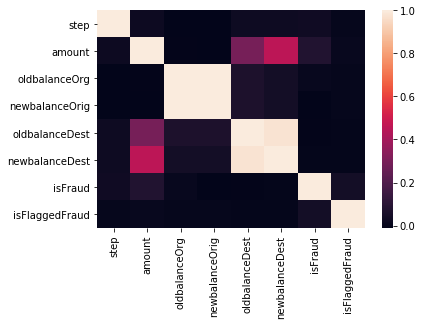

In [9]:
sns.heatmap(clone.corr())

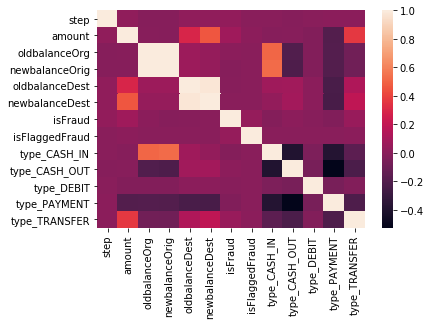

In [10]:
clone_dummies = pd.get_dummies(data=clone, columns=['type'])
sns.heatmap(clone_dummies.corr())
#Paolo: good idea to dummify the type column

### What is the distribution of the outcome? 

In [11]:
# Your response here
# I would say that there is not a big correlation between the dependant variable and other features in this dataframe. The 
# variables that have a slight correlations are ammount, type_CASH_OUT, type_PAYMENT, type_TRANSFER

# I would also remove one of ['newbalanceOrig', 'oldbalanceOrig'] and ['newbalanceDest', 'oldbalanceDest'] since theyre 
# highly correlated between them.

#Paolo: Here with outcome it is meant the Fraud variable, what is its distribution? 
#You will see that if you count
# its values there will many more no-fraudlent (0) then fraudlolent (1) behaviours
#It is an imbalanced problem, how can you fix it using downsampling?

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

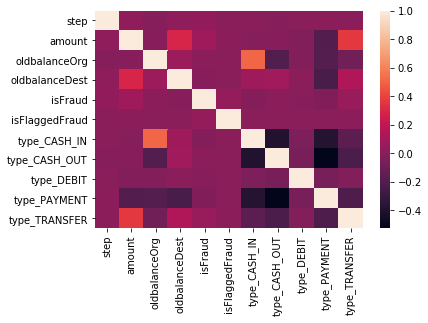

In [12]:
# Your code here
# I have no idea how could i integrate the time variable. If it is indeed a time variable then the integer coding is clearly
# not the appropiate one. But I dont see how I can translate these integers to date. IF this was a time series then I see
# how it would help to have the time variable and maybe the integer coding would help. But I definitely do not think this
# is a time series.

# Please this is something I would like to revisit.

clone_dummies.drop(['newbalanceOrig', 'newbalanceDest'], axis=1, inplace=True)
sns.heatmap(clone_dummies.corr())
#Paolo: you could use the column step plus its the description in kaggle where you
# downloaded the dataset to 
# make step into a time variable

### Run a logisitc regression classifier and evaluate its accuracy.

In [13]:
# Your code here
y = clone_dummies['isFraud']
X = clone_dummies.drop(['step', 'nameOrig', 'nameDest', 'isFraud', 'isFlaggedFraud'], axis=1)
model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
model.score(X,y)
#Paolo: good steps but be careful, here you should also split train and test!

0.9987091795518198

In [14]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

In [15]:
tn, fp, fn, tp

(6354407, 0, 8213, 0)

### Now pick a model of your choice and evaluate its accuracy.

In [ ]:
# Your code here
knn_model =  KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, y)

In [ ]:
knn_model.score(X, y)

In [ ]:
y_pred_knn = knn_model.predict(X)
tn, fp, fn, tp = confusion_matrix(y, y_pred_knn).ravel()
tn, fp, fn, tp
#Paolo: good steps but be careful, here you should also split train and test!

### Which model worked better and how do you know?

In [ ]:
# Paolo: What is the perfomance ont he test sets?
# The second one, KNN worked better because it was able to discern much more true positives than the previous model (which predicted none of the true positives)